In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = "latin-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
871,ham,Its going good...no problem..but still need li...,NaN,NaN,NaN
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt...",NaN,NaN,NaN
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,NaN,NaN,NaN
4565,ham,Should i buy him a blackberry bold 2 or torch....,NaN,NaN,NaN
3571,ham,"Yup, leaving right now, be back soon",NaN,NaN,NaN


In [ ]:
#split the data
df= pd.read_csv('/content/spam.csv', encoding='latin-1', usecols=['v1','v2'])

In [ ]:
df.sample(5)

,v1,v2
3477,ham,I can ask around but there's not a lot in term...
1213,ham,"Yeah, probably but not sure. Ilol let u know, ..."
3687,ham,I'll meet you in the lobby
4938,ham,Tomarrow i want to got to court. At &lt;DECIM...
4343,ham,Hi:)did you asked to waheeda fathima about leave?


**Data Preprocessing**

In [ ]:
df.rename(columns={'v1':'Message_Type', 'v2':'Message'},inplace=True)

In [ ]:
df.head()

,Message_Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
encoder = LabelEncoder()
df['Message_Type'] =encoder.fit_transform(df['Message_Type'])
df['Message'].sample(5)

2652                        No need for the drug anymore.
3036     Cos darren say Ì_ considering mah so i ask Ì_...
4826    Yup but it's not giving me problems now so may...
3333    That's fine, have him give me a call if he kno...
1293     Happy birthday... May all ur dreams come true...
Name: Message, dtype: object

In [ ]:
df[df['Message_Type']==1]

,Message_Type,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
df[df['Message_Type']==1].count()

Message_Type    747
Message         747
dtype: int64

**Exploratory Data Analysis**

In [ ]:
#shape of the dataset
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_Type  5572 non-null   int64 
 1   Message       5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

Message_Type    0
Message         0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,Message_Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Message_Type'].value_counts()

0    4516
1     653
Name: Message_Type, dtype: int64

**Pie Chart**

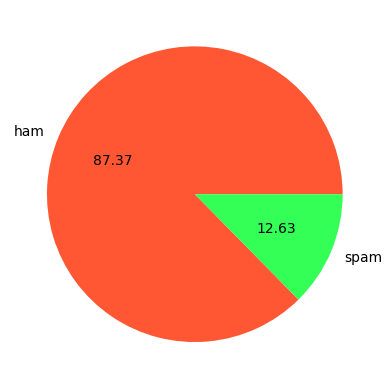

In [ ]:
colors = ['#FF5733', '#33FF57', '#5733FF', '#FF57CC']

plt.pie(df['Message_Type'].value_counts(),autopct='%.2f',labels=['ham','spam'],colors=colors)
plt.show()

Here we notified that clearly Data is imbalanced.


*   Having Less Spam Messages in Dataset




**Feature Engineering**

In [ ]:
#Total No. of characters in Data
df['No.Characters'] = df['Message'].apply(len)
df.head()

,Message_Type,Message,No.Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['Message'].apply(lambda x: nltk.word_tokenize(x))
df['No.Words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,Message_Type,Message,No.Characters,No.Words
2786,0,cThen i thk shd b enuff.. Still got conclusion...,116,27
4973,0,Aiyo u so poor thing... Then u dun wan 2 eat? ...,62,17
5332,0,I think steyn surely get one wicket:),37,9
1349,1,FREE2DAY sexy St George's Day pic of Jordan!Tx...,155,32
1048,0,I walked an hour 2 c u! doesnåÕt that show I c...,78,20


In [ ]:
df['No.Sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,Message_Type,Message,No.Characters,No.Words,No.Sentences
979,0,Another month. I need chocolate weed and alcohol.,49,10,2
137,0,No no. I will check all rooms befor activities,46,10,2
1635,0,You have come into my life and brought the sun...,159,35,2
4956,0,I'm vivek:)i got call from your number.,39,12,1
4363,0,So what about you. What do you remember,39,9,2


In [ ]:
#Statistical Analysis of new features
df[['No.Characters', 'No.Words', 'No.Sentences']].describe()

,No.Characters,No.Words,No.Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Analysis of Ham DAta
df[df['Message_Type']==0][['No.Characters', 'No.Words', 'No.Sentences']].describe()

,No.Characters,No.Words,No.Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Message_Type']==1][['No.Characters', 'No.Words', 'No.Sentences']].describe()

,No.Characters,No.Words,No.Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**Histogram Plot**

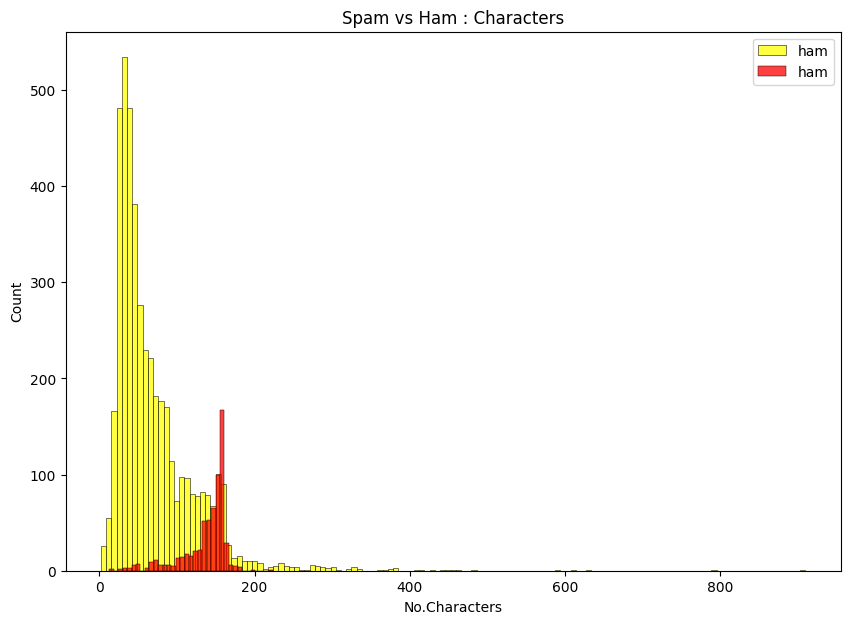

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Message_Type']==0]['No.Characters'],label='ham',color='yellow')
sns.histplot(df[df['Message_Type']==1]['No.Characters'],label='ham',color='red')
plt.title('Spam vs Ham : Characters')
plt.legend()
plt.show()

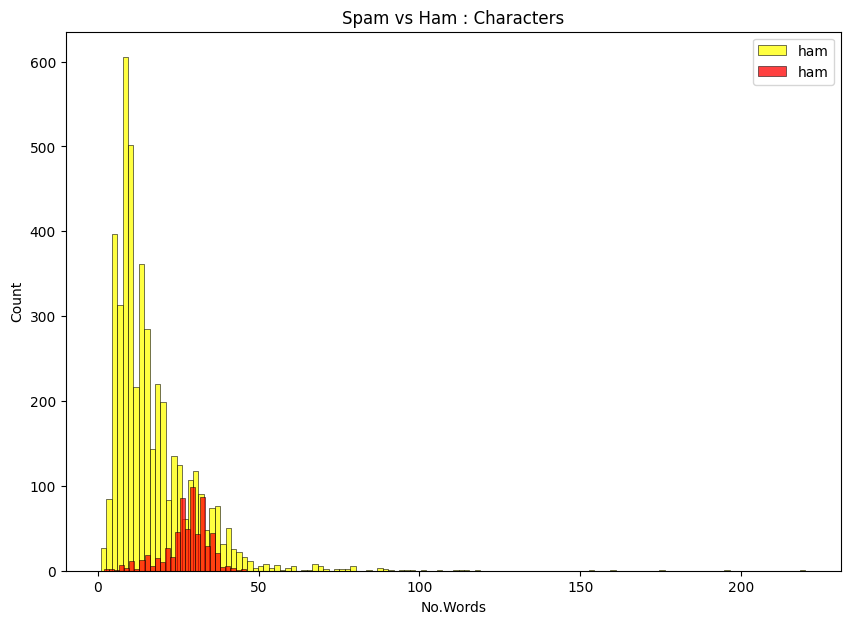

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Message_Type']==0]['No.Words'],label='ham',color='yellow')
sns.histplot(df[df['Message_Type']==1]['No.Words'],label='ham',color='red')
plt.title('Spam vs Ham : Characters')
plt.legend()
plt.show()

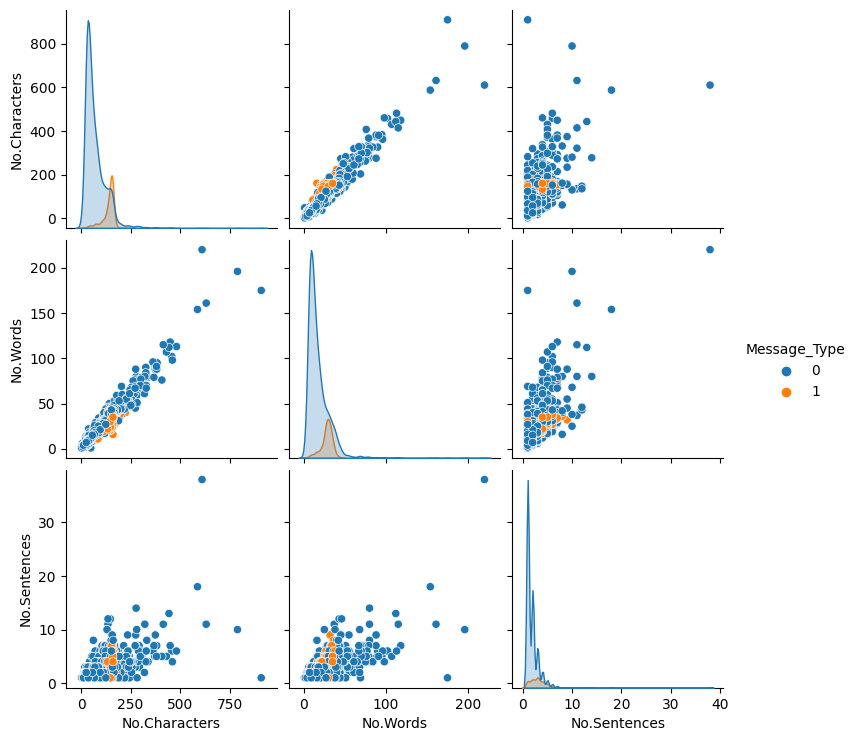

In [ ]:
sns.pairplot(df,hue='Message_Type')

observations : Outlier present

**Heatmap**










In [ ]:
# correlation between features
df.corr()

,Message_Type,No.Characters,No.Words,No.Sentences
Message_Type,1.000000,0.384717,0.262912,0.263939
No.Characters,0.384717,1.000000,0.965760,0.624139
No.Words,0.262912,0.965760,1.000000,0.679971
No.Sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

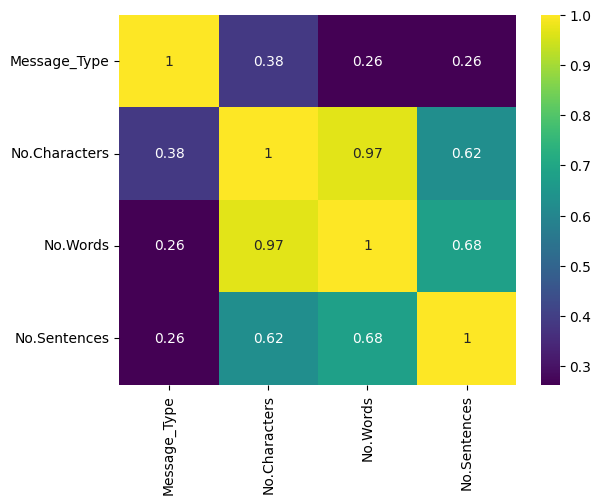

In [ ]:
sns.heatmap(df.corr(),annot = True, cmap = 'viridis')

In [ ]:
#Initilizing Porter Stemmer Class
ps = PorterStemmer()

In [ ]:
# This function helps to get Ready!!!
def data(text):
  text = text.lower()  # convert text into loweer case
  text = nltk.word_tokenize(text) #Breaks text into words
  y=[]
  for i in text:
    if i.isalnum():        # Removing special characters
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:        # Removing stopwords and Punctuation
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:             #Porter Stemmer removing unwanted words
    y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [ ]:
df.sample(2)

,Message_Type,Message,No.Characters,No.Words,No.Sentences
1231,0,have got * few things to do. may be in * pub l...,51,15,2
5492,1,Marvel Mobile Play the official Ultimate Spide...,161,33,2


In [ ]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["Message"].apply(data)

In [ ]:
df.sample(5)

,Message_Type,Message,No.Characters,No.Words,No.Sentences,new_data
1232,0,1's finish meeting call me.,27,7,1,1 finish meet call
2024,0,U having lunch alone? I now so bored...,39,10,2,u lunch alon bore
309,0,Where are the garage keys? They aren't on the ...,55,12,2,garag key bookshelf
1743,0,I love to wine and dine my lady!,32,9,1,love wine dine ladi
2463,0,"Good afternoon, babe. How goes that day ? Any ...",105,29,4,good afternoon babe goe day job prospect yet m...


**Word Cloud**

In [ ]:
wc = WordCloud(background_color=None,
               width = 800,
               height = 400
               )

In [ ]:
# WordCloud for SPAM
spam_wc = wc.generate(df[df['Message_Type']==1]['new_data'].str.cat(sep=" "))
Ham_wc = wc.generate(df[df['Message_Type']==0]['new_data'].str.cat(sep=" "))


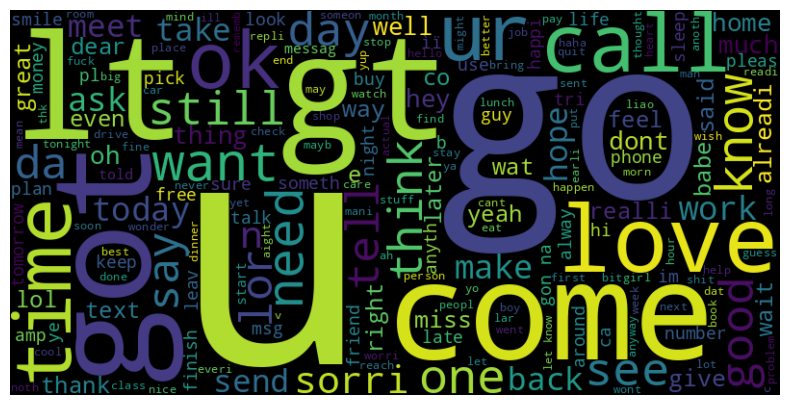

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

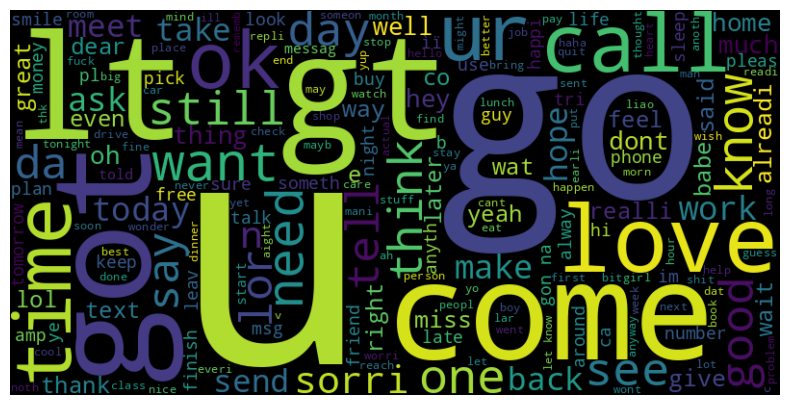

In [ ]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(Ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["Message_Type"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

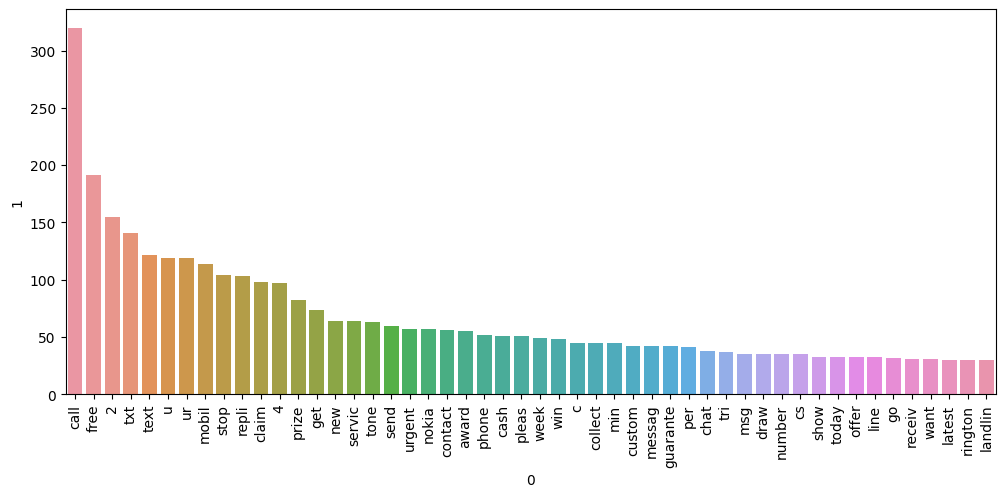

In [ ]:
a = pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x=a,y=b)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['Message_Type'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

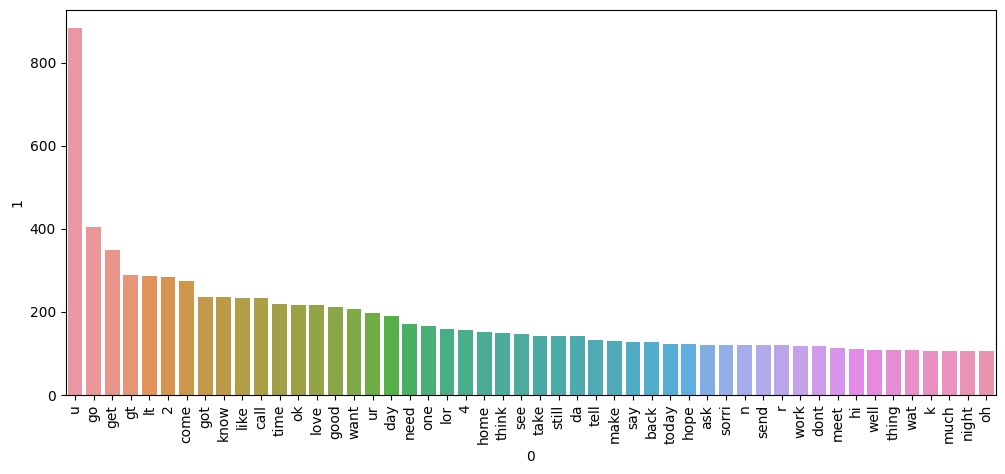

In [ ]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

**Vectorization**

In [ ]:
tfidv = TfidfVectorizer(max_features=3000)

In [ ]:
#Independent Feature
X = tfidv.fit_transform(df['new_data']).toarray()


In [ ]:
#Dependent Feature
y = df['Message_Type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

**Models Training**

In [ ]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [ ]:
# Creating a function train each model and calculate/return accuracy and precision

def train_clf(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred)

  return acc, pre

In [105]:
# A FOR loop calls "train_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]
for name, model in models.items():
  accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
  acc_s.append(accuracy)
  pre_s.append(precision)

In [106]:
# Precison matter over Accuracy in this Data, Sorting in DESC order of precision. All Scores of MOdels

scores_df = pd.DataFrame({'Algorithm':models.keys(),
                          'Accuracy':acc_s,
                          'Precision':pre_s}).sort_values(by = 'Precision', ascending =False)

In [107]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
8,Random Forest,0.973888,0.982609
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.978723,0.975410
12,XGB,0.971954,0.936000
10,Ada Boost,0.960348,0.929204
11,Gradient Boost,0.952611,0.923810


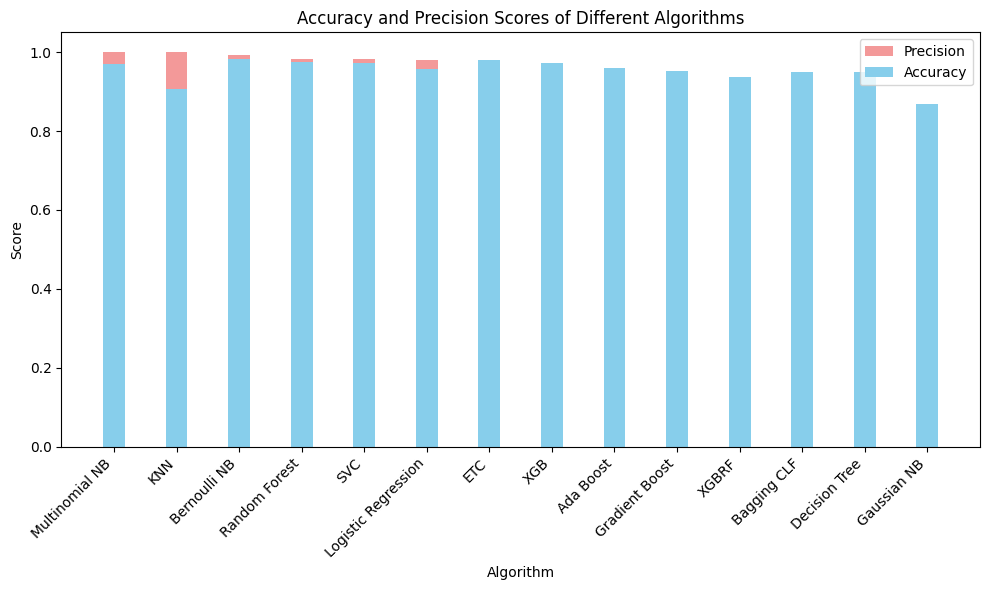

In [108]:
# Graph Accuracy and Precision
plt.figure(figsize = (10,6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [109]:

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [110]:

mnb=BernoulliNB()
mnb.fit(X_train, y_train)

BernoulliNB()

**Pickle files**

In [111]:
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(tfidv, open('vectorizer.pkl','wb'))
pickle.dump(data, open('fun.pkl','wb'))